In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''df = pd.read_csv("ieee.csv")
df1 = pd.read_csv("IEEE.csv")
df['month']= df1['month']
df.iloc[49, df.columns.get_loc('month')] = 'Dec'
df.iloc[48, df.columns.get_loc('month')] = 'Feb'
df.iloc[47, df.columns.get_loc('month')] = 'May'

df.tail()'''

'df = pd.read_csv("ieee.csv")\ndf1 = pd.read_csv("IEEE.csv")\ndf[\'month\']= df1[\'month\']\ndf.iloc[49, df.columns.get_loc(\'month\')] = \'Dec\'\ndf.iloc[48, df.columns.get_loc(\'month\')] = \'Feb\'\ndf.iloc[47, df.columns.get_loc(\'month\')] = \'May\'\n\ndf.tail()'

In [3]:
'''df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df2 = df.drop(['number', 'volume'], axis=1)

df2[['start','end']] = df2.pages.str.split("-",expand=True)
df2[['start', 'end']] = df2[['start', 'end']].apply(pd.to_numeric) 
df2['no_of_pages'] = df2['end'] - df2['start'] + 1
ieee = df2.drop(['pages'], axis=1)
ieee.head(50)'''

'df.drop(df.columns[df.columns.str.contains(\'unnamed\',case = False)],axis = 1, inplace = True)\ndf2 = df.drop([\'number\', \'volume\'], axis=1)\n\ndf2[[\'start\',\'end\']] = df2.pages.str.split("-",expand=True)\ndf2[[\'start\', \'end\']] = df2[[\'start\', \'end\']].apply(pd.to_numeric) \ndf2[\'no_of_pages\'] = df2[\'end\'] - df2[\'start\'] + 1\nieee = df2.drop([\'pages\'], axis=1)\nieee.head(50)'

In [4]:
'''ieee.to_csv('Ieee_new.csv')'''

"ieee.to_csv('Ieee_new.csv')"

In [5]:
ieee = pd.read_csv('Ieee_new.csv')
ieee.drop(ieee.columns[ieee.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
ieee.head(5)

,id,author,abstract,booktitle,title,year,keywords,doi,ISSN,month,start,end,no_of_pages
0,8862251,"A Kumar, S Panda",This paper lights on Python amongst other diff...,2019 International Conference on Machine Learn...,A Survey: How Python Pitches in IT-World,2019,Python;multiparadigm language platform;Big Dat...,10.1109/COMITCon.2019.8862251,NaN,Feb,248.0,251.0,4.0
1,8462463,"D Can, V Martinez, P Papadopoulos, S Narayanan","We present PyKaldi, a free and open-source Pyt...",2018 IEEE International Conference on Acoustic...,Pykaldi: A Python Wrapper for Kaldi,2018,authoring languages;public domain software;Pyt...,10.1109/ICASSP.2018.8462463,2379-190X,April,5889.0,5893.0,5.0
2,8952190,L Yu,"In recent years, the extensive application of ...",2019 34th IEEE/ACM International Conference on...,Empirical Study of Python Call Graph,2019,graph theory;program diagnostics;Python;softwa...,10.1109/ASE.2019.00160,2643-1572,Nov,1274.0,1276.0,3.0
3,8506789,"F Liu, Z Yang",A kind of automatic operation and maintenance ...,2018 International Conference on Advanced Mech...,Design of VMware vSphere Automatic Operation a...,2018,application program interfaces;cloud computing...,10.1109/ICAMechS.2018.8506789,2325-0690,Aug,283.0,286.0,4.0
4,8845524,"X Liu, H Xu",To meet the needs of enterprises for data anal...,2019 14th International Conference on Computer...,School-Enterprise Cooperation on Python Data A...,2019,computer aided instruction;computer science ed...,10.1109/ICCSE.2019.8845524,2473-9464,Aug,278.0,281.0,4.0


In [6]:
ieee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50 non-null     int64  
 1   author       50 non-null     object 
 2   abstract     50 non-null     object 
 3   booktitle    50 non-null     object 
 4   title        50 non-null     object 
 5   year         50 non-null     int64  
 6   keywords     49 non-null     object 
 7   doi          48 non-null     object 
 8   ISSN         17 non-null     object 
 9   month        49 non-null     object 
 10  start        49 non-null     float64
 11  end          49 non-null     float64
 12  no_of_pages  49 non-null     float64
dtypes: float64(3), int64(2), object(8)
memory usage: 5.2+ KB


In [7]:
ieee['no_of_pages'].describe()

count    49.000000
mean      4.591837
std       1.526411
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: no_of_pages, dtype: float64

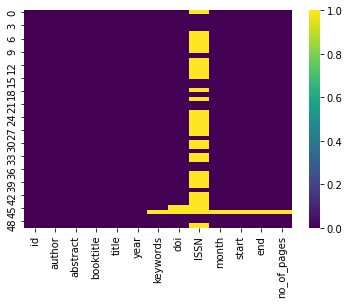

In [8]:
sns.heatmap(ieee.isnull(),cmap='viridis',cbar='true')

**Inference** **:** This Heatmap shows that column ISSN contains majority of Null Values so it will not contibute towards analysis, it will be better to drop it.

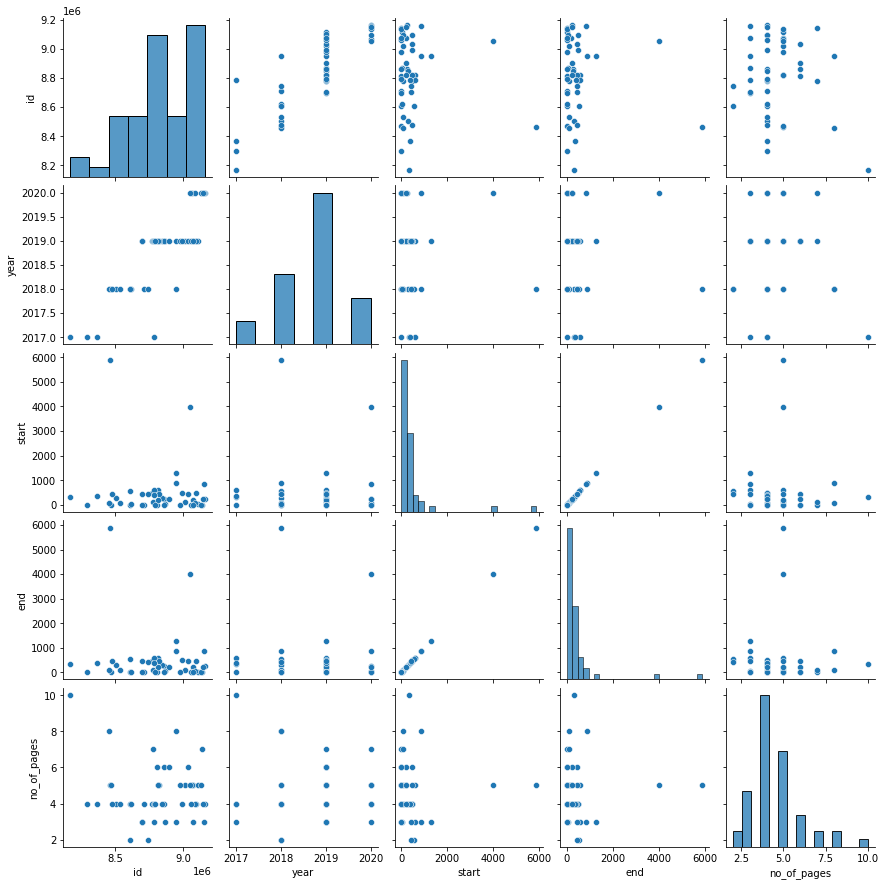

In [9]:
sns.pairplot(ieee) 

I plot this pairplot to analyse relations between different numeric based columns.

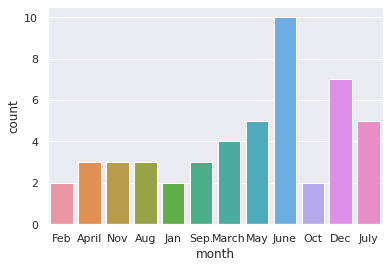

In [10]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="month", data=ieee)

**Inference** : This Bar graph on the data sample shows that most papers in IEEE journal were published month of June & very less papers were published in month of Jan, Feb and October

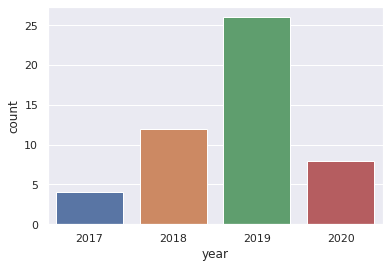

In [11]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="year", data=ieee)

**Inference :** This Bar graph on the data sample shows that majority of papers were published in year 2019. Very less no. of publications are there in year 2017

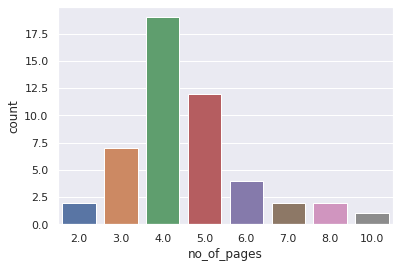

In [12]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="no_of_pages", data=ieee)

**Inference :** This Count plot shows that majority of Research papers are of medium length with 4-5 pages.

In [13]:
df=pd.read_csv('Ieee_new.csv')
df.head(5)

,Unnamed: 0,id,author,abstract,booktitle,title,year,keywords,doi,ISSN,month,start,end,no_of_pages
0,0,8862251,"A Kumar, S Panda",This paper lights on Python amongst other diff...,2019 International Conference on Machine Learn...,A Survey: How Python Pitches in IT-World,2019,Python;multiparadigm language platform;Big Dat...,10.1109/COMITCon.2019.8862251,NaN,Feb,248.0,251.0,4.0
1,1,8462463,"D Can, V Martinez, P Papadopoulos, S Narayanan","We present PyKaldi, a free and open-source Pyt...",2018 IEEE International Conference on Acoustic...,Pykaldi: A Python Wrapper for Kaldi,2018,authoring languages;public domain software;Pyt...,10.1109/ICASSP.2018.8462463,2379-190X,April,5889.0,5893.0,5.0
2,2,8952190,L Yu,"In recent years, the extensive application of ...",2019 34th IEEE/ACM International Conference on...,Empirical Study of Python Call Graph,2019,graph theory;program diagnostics;Python;softwa...,10.1109/ASE.2019.00160,2643-1572,Nov,1274.0,1276.0,3.0
3,3,8506789,"F Liu, Z Yang",A kind of automatic operation and maintenance ...,2018 International Conference on Advanced Mech...,Design of VMware vSphere Automatic Operation a...,2018,application program interfaces;cloud computing...,10.1109/ICAMechS.2018.8506789,2325-0690,Aug,283.0,286.0,4.0
4,4,8845524,"X Liu, H Xu",To meet the needs of enterprises for data anal...,2019 14th International Conference on Computer...,School-Enterprise Cooperation on Python Data A...,2019,computer aided instruction;computer science ed...,10.1109/ICCSE.2019.8845524,2473-9464,Aug,278.0,281.0,4.0


In [14]:
df['keywords'] = df['keywords'].astype(str)
count=df.keywords.apply(lambda x: pd.value_counts(x.split(";"))).sum(axis = 0)
count.to_csv('keyword.csv')

In [15]:
df['author']=df['author'].astype(str)
count_auth=df.author.apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0)
count_auth.to_csv('author.csv')

In [16]:
auth = pd.read_csv('author.csv')
keyword = pd.read_csv('keyword.csv')

In [17]:
auth.rename( columns={'Unnamed: 0':'authors'}, inplace=True )
auth.rename( columns={'0':'no of publications'}, inplace=True )
auth.head(5)

,authors,no of publications
0,S Panda,1.0
1,A Kumar,1.0
2,P Papadopoulos,1.0
3,V Martinez,1.0
4,S Narayanan,1.0


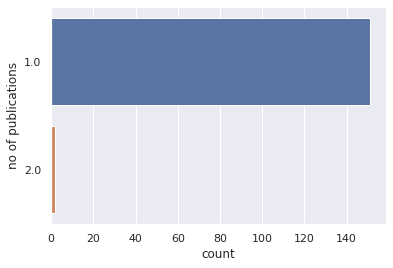

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(y="no of publications", data=auth)

**Inference :** This graph clearly shows that this data sample contains mostly publishers with one publications in IEEE journal between year 2017 to 2020.

In [19]:
keyword.rename( columns={'Unnamed: 0':'words'}, inplace=True )
keyword.rename( columns={'0':'keyword counts'}, inplace=True )
keyword.head()

,words,keyword counts
0,Python,114.0
1,Sentiment analysis,1.0
2,Big Data,1.0
3,Data structures,1.0
4,Programming,4.0


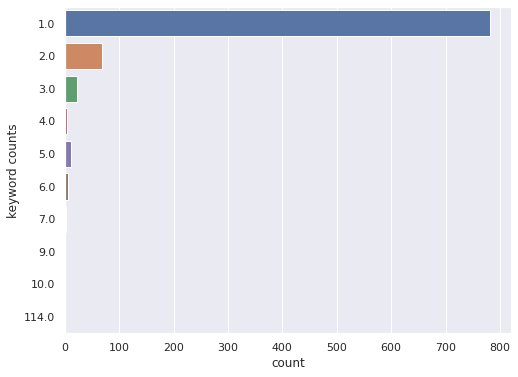

In [20]:
sns.set_theme(style="darkgrid")
fig_dims = (8, 6)

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y="keyword counts",ax=ax, data=keyword)

**Inference :** This graph shows the no. of occurances for different keywords. For example there are around 700-800 keyword which occur only 1 time and less then 10 keyword which occur 4 times. 